In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import glob

In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\wangj\Anaconda3\envs\ee_py3\lib\

In [2]:
# define the years 
Year = list(range(2001,2009)) + list(range(2013,2019))

##### Read Climate and NDVI data

In [3]:
# read Climate csv
climate_csv = glob.glob('./Data/without_cloud_mask/Climate_*.csv')
climate_df_list = []

for f in climate_csv:
       
    # reand the df and parse date
    df = pd.read_csv(f,parse_dates=['Date'])
    climate_df_list.append(df)

# concat all climate_df into one df
climate_df = pd.concat(climate_df_list,0)
climate_df.reset_index(inplace=True,drop=True)

In [4]:
# read NDVI_withou_cloud_mask csv
NDVI_csv = glob.glob('./Data/without_cloud_mask/MODIS_NDVI_*')
NDVI_df_list = []

for f in NDVI_csv:
       
    # reand the df and parse date
    df = pd.read_csv(f,parse_dates=['YMD'])
    # arrange the df
    df['Date'] = df['YMD']
    df = df.drop('YMD',1)
    df = df[['Date','NAME', 'NDVI' ]]
    
    NDVI_df_list.append(df)

# concat all climate_df into one df
NDVI_df = pd.concat(NDVI_df_list,0)
NDVI_df.reset_index(inplace=True,drop=True)

# filter the data in target years
NDVI_df = NDVI_df[NDVI_df['Date'].dt.year.isin(Year)]

In [5]:
# read NDVI_cloud_masked csv

NDVI_masked_csv = glob.glob('./Data/with_cloud_mask/*.csv')
NDVI_masked_df_list = []

for f in NDVI_masked_csv:
       
    # reand the df and parse date
    df = pd.read_csv(f,parse_dates=['YMD'])
    # arrange the df
    df['Date'] = df['YMD']
    df = df.drop('YMD',1)
    df = df[['Date','NAME', 'NDVI' ]]    
    
    # concat all df to one
    NDVI_masked_df_list.append(df)

# concat all climate_df into one df
NDVI_masked_df = pd.concat(NDVI_masked_df_list,0)
NDVI_masked_df.reset_index(inplace=True,drop=True)

# filter the data in target years
NDVI_masked_df = NDVI_masked_df[NDVI_masked_df['Date'].dt.year.isin(Year)]

##### Concate NDVI_df with Climate_df

In [6]:
# merge Climate_df with NDVI_mask_df, useing climate as main key because it has all recoreds for each day in the target years
data = pd.merge(climate_df,NDVI_masked_df,left_on=['Date','NAME'],right_on=['Date','NAME'],how = 'left')

# intopolate the null value of NDVI,
data = data.sort_values(['Date','NAME'])
data = data.interpolate(limit_direction='both')
data = data.sort_values(['NAME','Date'])

In [7]:
data

,Date,NAME,Area,Albedo_inst,AvgSurfT_inst,CanopInt_inst,ECanop_tavg,ESoil_tavg,Evap_tavg,LWdown_f_tavg,...,SoilMoi40_100cm_inst,SoilTMP0_10cm_inst,SoilTMP100_200cm_inst,SoilTMP10_40cm_inst,SoilTMP40_100cm_inst,Swnet_tavg,Tair_f_inst,Tveg_tavg,Wind_f_inst,NDVI
92,2001-01-01,上蔡县,1507.150,18.423127,278.973359,0.042567,4.106985,17.523134,1.219356e-05,278.508345,...,160.006416,279.448185,283.110664,279.922253,281.211210,71.784304,280.512647,8.447369,3.821237,0.387425
247,2001-01-02,上蔡县,1507.150,18.577235,278.230504,0.020431,2.967367,10.439595,7.885690e-06,277.982970,...,159.590881,278.373212,283.031702,279.850869,281.178303,80.134545,279.461531,5.747781,1.777187,0.387425
402,2001-01-03,上蔡县,1507.150,18.459500,275.109867,0.000000,0.003391,21.374002,1.168983e-05,238.130987,...,159.230357,276.877828,282.953398,279.476251,281.104734,97.947352,275.602725,6.810954,4.485382,0.120019
557,2001-01-04,上蔡县,1507.150,18.389800,275.693528,0.000000,0.001083,9.070885,5.245227e-06,258.268999,...,158.746793,276.083430,282.874753,278.914702,280.952225,92.684368,276.159525,4.729566,2.708520,0.105565
712,2001-01-05,上蔡县,1507.150,18.429593,278.256112,0.000608,0.196932,12.183381,7.251959e-06,307.032400,...,158.385845,277.783973,282.790518,278.777222,280.761177,77.712049,277.894870,5.142580,4.319664,0.183901
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
791790,2018-12-27,龙安区,232.077,15.766613,267.700003,0.000000,0.000000,2.064718,9.371928e-07,249.620613,...,85.997904,270.002179,282.433980,275.236445,278.563146,39.608024,266.943641,0.000000,4.348915,0.404313
791945,2018-12-28,龙安区,232.077,15.734597,264.271341,0.000000,0.000000,1.121492,5.239567e-07,187.918979,...,85.940634,266.910991,282.307847,274.158557,278.230199,86.680322,264.644122,0.000000,1.749502,0.288876
792100,2018-12-29,龙安区,232.077,15.659033,265.426802,0.000000,0.000000,1.176452,5.433606e-07,188.297667,...,85.877587,267.098642,282.176494,273.351711,277.901418,84.845362,267.456123,0.000000,1.763611,0.289547
792255,2018-12-30,龙安区,232.077,15.587096,267.276062,0.000000,0.000000,1.202621,5.556114e-07,210.728692,...,85.816555,267.941068,282.031512,272.496452,277.488186,89.409919,267.970732,0.000000,1.369998,0.281210


##### Note that masked-NDVI is less affected by noisy than raw-NDVI, so we interpolate the maked-NDVI at each day of a given year

In [8]:
# get one county and plot the ndvi
df_one_masked_ndvi = data[(data['NAME'] == '博爱县')&(data['Date'].dt.year == 2001)].reset_index()
df_one_raw_ndvi   = NDVI_df[(NDVI_masked_df['NAME'] == '博爱县')&(NDVI_masked_df['Date'].dt.year == 2001)].reset_index()

<AxesSubplot:xlabel='Date', ylabel='NDVI'>

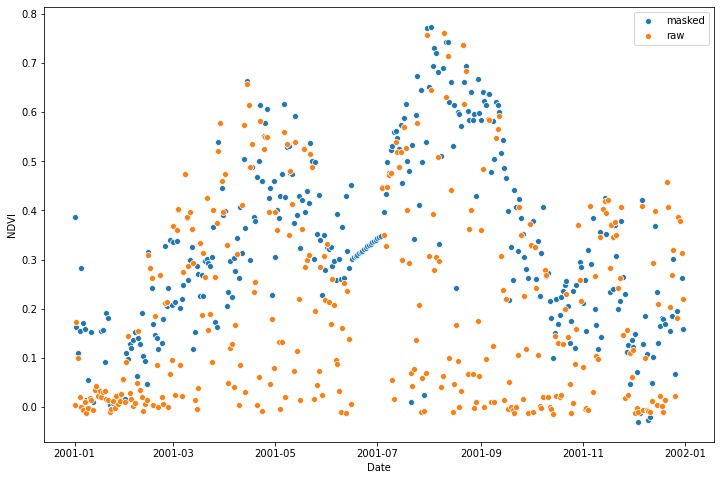

In [10]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_one_masked_ndvi,x='Date',y='NDVI',label='masked')
sns.scatterplot(data=df_one_raw_ndvi,  x='Date',y='NDVI',label='raw')

<AxesSubplot:>

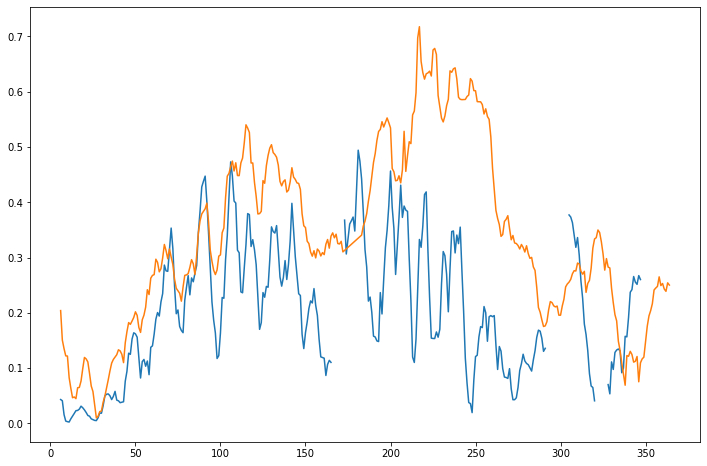

In [11]:
plt.figure(figsize=(12,8))
df_msk = df_one_masked_ndvi['NDVI'].rolling(7).sum()/7
df_raw = df_one_raw_ndvi['NDVI'].rolling(7).sum()/7

df_raw.plot()
df_msk.plot()

##### Find out the same counties between Remote sensed data and Yearbook data

In [12]:
# import year book data
yearbook_df = pd.read_csv('../Step_1_Process_Yearbook_Data/02_Digitized_data/Yearbook_all.csv')

In [13]:
# use names as key to filter all data
modis_names = data['NAME'].unique()
yearbook_names = yearbook_df['Region'].unique()

# find out the names that can be found in both source
intersect_names = list(set(modis_names) & set(yearbook_names))

In [14]:
# use the intersect_nams to filter Remote-sensed data and Yearbook data
RS_data = data[data['NAME'].isin(intersect_names)]
Yb_data = yearbook_df[yearbook_df['Region'].isin(intersect_names)]

In [15]:
# loop through each year to filter the Remote-sensed data and Yearbook data based on names

RS_data_list = []
YB_data_list = []

for year in Year:
    
    # filter the data within this year
    rs_data = data[data['Date'].dt.year == year]
    yb_data = yearbook_df[yearbook_df['Year'] == year]
    
    # use names as key to filter all data
    re_names = rs_data['NAME'].unique()
    yb_names = yb_data['Region'].unique()
    intersect_names = list(set(re_names) & set(yb_names))
    
    # use the intersect_nams to filter Remote-sensed data and Yearbook data
    RS_out_df = rs_data[rs_data['NAME'].isin(intersect_names)]
    Yb_out_df = yb_data[yb_data['Region'].isin(intersect_names)]
    
    # append data to list
    RS_data_list.append(RS_out_df)
    YB_data_list.append(Yb_out_df)

In [16]:
# concat all df into one df
remote_data = pd.concat(RS_data_list,0)
yrbook_data = pd.concat(YB_data_list,0)

# save data to drive
remote_data.to_csv('./Data/without_cloud_mask/Remote_data.csv',index=False,encoding='utf-8-sig')
yrbook_data.to_csv('./Data/without_cloud_mask/Yrbook_data.csv',index=False,encoding='utf-8-sig')